**(minimum) path integral Monte Carlo for harmonic oscillators**

1. every particle is distinguishable (Boltzmons)
2. every particle has the same attributes (mass, charge etc.)
3. every particle is trapped by the same (harmonic) potential centered at the origin 
4. open boundary condition
5. three dimensional space

In [1]:
using PyPlot

In [7]:
type Path
    # a configuration sampled in PIMC
    
    # number of imaginary time slices
    num_slices::Int64 
    # number of particles
    num_particles::Int64 
    
    # configration (positions of all particles at all time slices)
    #  Rti[t,i,:] is the 3D-vector of particle i's location at imaginary time t
    Rti::Array{Float64,3}
    # Rti[t,:,:] contains the positions of all particles at time slice t
    # Rti[:,i,:] contains the positions of particle i at all time slices
    # the last index is for x,y,z
    
    function Path(M::Integer,N::Integer)
        num_slices = M
        num_particles = N
        Rti = rand(num_slices,num_particles,3)
        
        new(num_slices,num_particles,Rti)
    end
end

In [42]:
function visualize(path::Path;projection::ASCIIString="xy")
    
    # project the 3D particle positions onto 2 dimensions
    proj = split(projection,"")
    dim_map = Dict("x"=>1,"y"=>2,"z"=>3)
    xid = dim_map[proj[1]]
    yid = dim_map[proj[2]]
    for iatom=1:path.num_particles
        x = path.Rti[:,iatom,xid]
        y = path.Rti[:,iatom,yid]
        x = reshape(x,length(x))
        y = reshape(y,length(y))
        # each ring should connect back to itself
        push!(x,x[1])
        push!(y,y[1])
        plot(x,y,"x--",mew=2,label=@sprintf("particle %d",iatom) )
        for j=1:length(x)-1
            annotate("slice $j", xy=(x[j],y[j]) )
        end
    end
    legend()
    
end

visualize (generic function with 1 method)

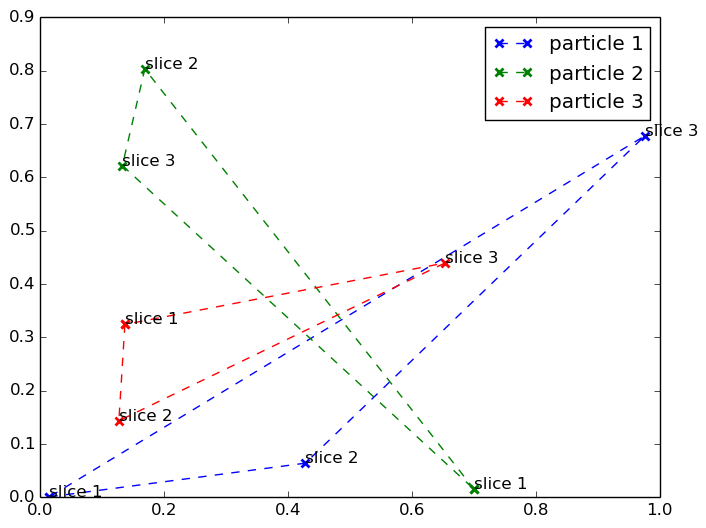

PyObject <matplotlib.legend.Legend object at 0x7f34f0eaa810>

In [43]:
path = Path(3,3)
visualize(path)